In [ ]:
# pip install geopandas

In [36]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('./CSVs/coord_no_zeros.csv')

In [38]:
df.head()

,Baths,Beds,Location,Square Meter,base_price,city,country,page,price_usd,property_type,sub_div,lat,lon
0,2,2,"Baymount, Al Ain Al Sokhna, Suez",105,1200000,Suez,Egypt,buy,18876000.0,Chalet,Al Ain Al Sokhna,30.074282,31.544374
1,2,2,"Aroma Residence, Al Ain Al Sokhna, Suez",95,1550000,Suez,Egypt,buy,24381500.0,Chalet,Al Ain Al Sokhna,30.074282,31.544374
2,4,5,"Mivida, 5th Settlement Compounds, The 5th Sett...",391,8400000,Cairo,Egypt,buy,132132000.0,Villa,New Cairo City,30.063103,31.455447
3,2,3,"IL Monte Galala, Al Ain Al Sokhna, Suez",119,2900000,Suez,Egypt,buy,45617000.0,Chalet,Al Ain Al Sokhna,30.074282,31.544374
4,2,2,"Century City, 5th Settlement Compounds, The 5t...",100,1425000,Cairo,Egypt,buy,22415250.0,Apartment,New Cairo City,30.063103,31.455447


In [39]:
df.shape

(4324, 13)

In [40]:
df[['lat', 'lon']].describe()

,lat,lon
count,4324.000000,4324.000000
mean,30.055614,31.413382
std,0.029911,0.102213
min,30.001100,31.213451
25%,30.033333,31.367206
50%,30.063103,31.455447
75%,30.063103,31.488994
max,30.290010,31.760475


In [41]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = {'init' :'epsg:4326'}

geo = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

geo.head()

,Baths,Beds,Location,Square Meter,base_price,city,country,page,price_usd,property_type,sub_div,lat,lon,geometry
0,2,2,"Baymount, Al Ain Al Sokhna, Suez",105,1200000,Suez,Egypt,buy,18876000.0,Chalet,Al Ain Al Sokhna,30.074282,31.544374,POINT (30.07428 31.54437)
1,2,2,"Aroma Residence, Al Ain Al Sokhna, Suez",95,1550000,Suez,Egypt,buy,24381500.0,Chalet,Al Ain Al Sokhna,30.074282,31.544374,POINT (30.07428 31.54437)
2,4,5,"Mivida, 5th Settlement Compounds, The 5th Sett...",391,8400000,Cairo,Egypt,buy,132132000.0,Villa,New Cairo City,30.063103,31.455447,POINT (30.06310 31.45545)
3,2,3,"IL Monte Galala, Al Ain Al Sokhna, Suez",119,2900000,Suez,Egypt,buy,45617000.0,Chalet,Al Ain Al Sokhna,30.074282,31.544374,POINT (30.07428 31.54437)
4,2,2,"Century City, 5th Settlement Compounds, The 5t...",100,1425000,Cairo,Egypt,buy,22415250.0,Apartment,New Cairo City,30.063103,31.455447,POINT (30.06310 31.45545)


In [42]:
geo.tail()

,Baths,Beds,Location,Square Meter,base_price,city,country,page,price_usd,property_type,sub_div,lat,lon,geometry
4319,NaN,NaN,Imbaba,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,30.083333,31.216667,POINT (30.08333 31.21667)
4320,NaN,NaN,Ramlet Boulak,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,30.071100,31.230000,POINT (30.07110 31.23000)
4321,NaN,NaN,Ezbet Abu Qarn,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,30.001100,31.231600,POINT (30.00110 31.23160)
4322,NaN,NaN,Ezbet El Haggana,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,30.064500,31.381600,POINT (30.06450 31.38160)
4323,NaN,NaN,Shubra Al Kheima,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,30.128611,31.242222,POINT (30.12861 31.24222)


In [47]:
geo.to_csv('./CSVs/geomap.csv', index = False)

In [44]:
df['base_price'].describe()

count    4.324000e+03
mean     2.780751e+06
std      3.270582e+07
min      1.000000e+00
25%      2.500000e+04
50%      1.132500e+05
75%      2.850000e+06
max      2.125000e+09
Name: base_price, dtype: float64

In [45]:
# NEED SHAPE FILE OF CAIRO
cairo_map = gpd.read_file('../egypt_highway/egypt_highway.shp')

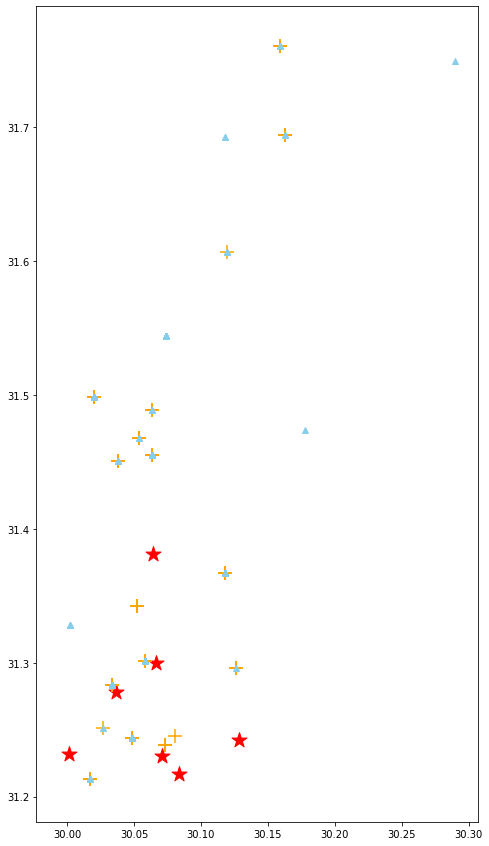

In [46]:
fig,ax = plt.subplots(figsize = (15,15))
#cairo_map.plot(ax = ax, color = 'blue', alpha = 0.10)
geo[geo['base_price'] == 1].plot(ax = ax, marker = "*", markersize = 250, color = 'red');
geo[(geo['base_price'] > 1) & (geo['base_price'] <= 2.500000e+04)].plot(ax = ax, marker = "+", markersize = 200, color = 'orange')
geo[geo['base_price'] > 2.600000e+06].plot(ax = ax, marker = "^", color = 'skyblue');

